# RNNS

Why? Sequence models that have "memory"
-  speech recognition  x:audio -> y:transcript in text
-  music generation x:first notes -> y: music
- sentiment classification x: text -> y:sentiment
- dna sequence analysis x: dna sequence -> label dna corresponding to protin
- machine translation language
- video activity recognition
- name entity recognition x: text -> y: identify and locate people in the text


Why not standard feed forward nn?

1. The input and outputs can be different depending on the example.
2. Features learned across different positions of the sequence are not shared. We want things learned in one part of the input, to be learned and generalizable to other parts of the input.


**Notation**:
- Superscript $[l]$ denotes an object associated with the $l^{th}$ layer. 

- Superscript $(i)$ denotes an object associated with the $i^{th}$ example. 

- Superscript $\langle t \rangle$ denotes an object at the $t^{th}$ time 
step. 
    
- Subscript $i$ denotes the $i^{th}$ entry of a vector.

**Example**:  
- $a^{(2)[3]<4>}_5$ denotes the activation of the 2nd training example (2), 3rd layer [3], 4th time step <4>, and 5th entry in the vector.


# Unidirectional RNN

- For every time step, Wax, Waa and Wya are shared in every timestep.
- To make the prediction, for instance, of y^3, the information of x^1 and x^2 are used.
- But doesnt use information from the later instances like x^4, x^4. For that we need bidirectional

If Tx = Ty (many-to-many):

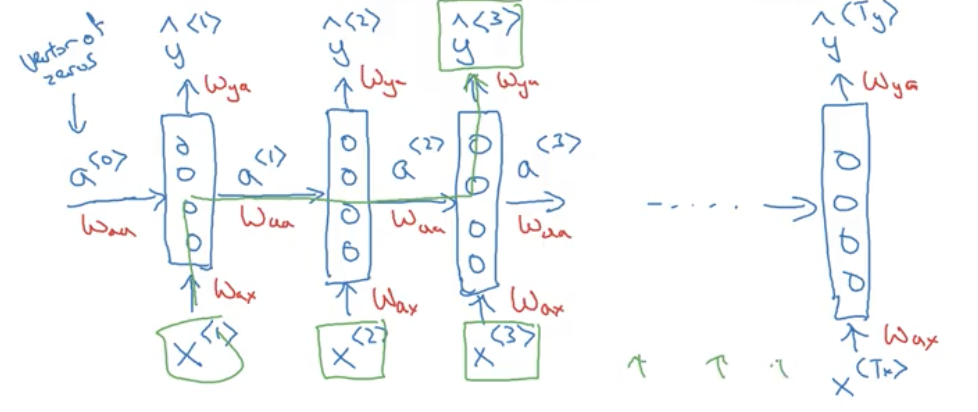



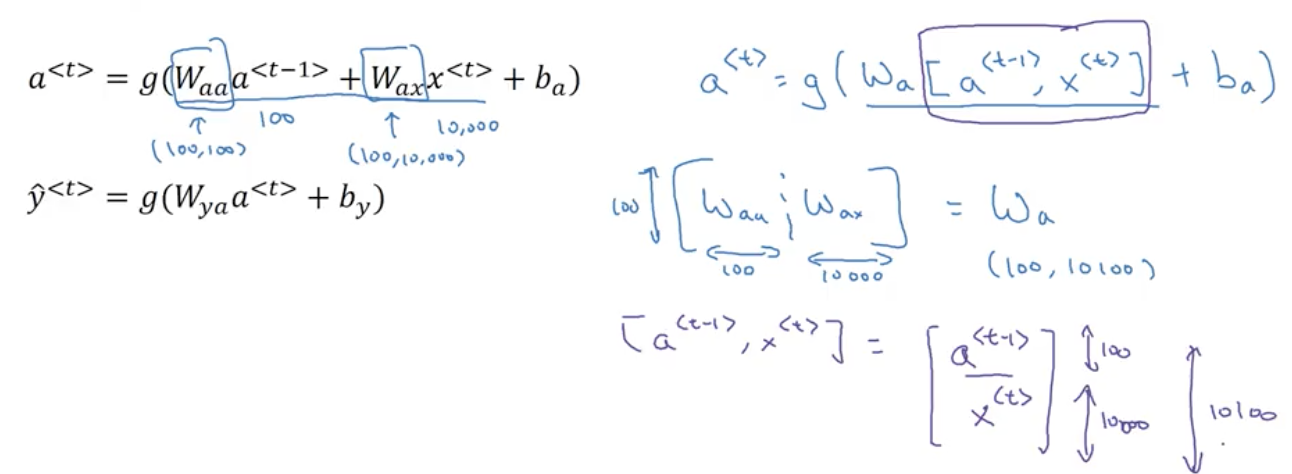

# Backpropagation of RNNs - backpropogation through time

### cross entropy loss, loss for each position:

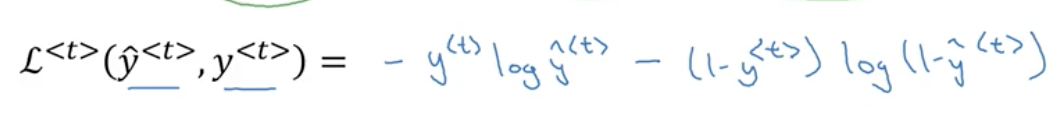

### loss = sum of loss per position t




## What if Tx != Ty?

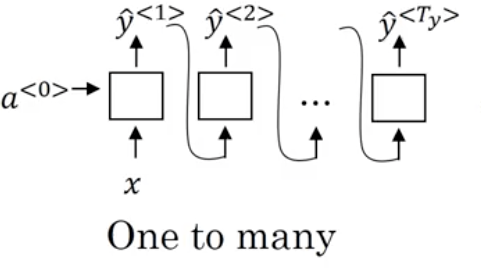

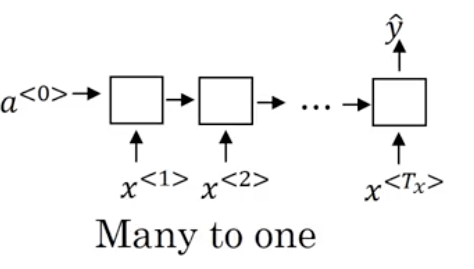

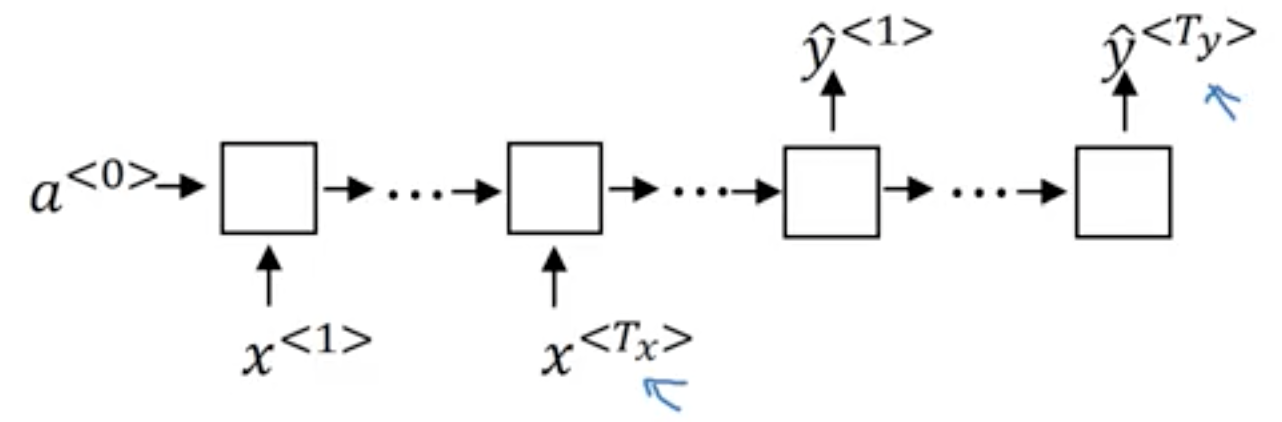


## How to Build a Language Model with an RNN

A language model assigns a probability to a sequence of words (a sentence).

Example:

- P(The apple and pair salad) < P(The apple and pear salad)

This means:  
P(y¹, y², ..., yᵀᵧ) — the joint probability of all words in the sentence.

1. **Training Set**: A large corpus (set of sentences).
2. **Vocabulary**: Build a vocabulary from the training data.
3. **Preprocessing**:
   - Tokenize each sentence using one-hot vectors from the vocabulary.
   - Add a special token for End of Sentence (e.g., `EOS`).
   - Replace out-of-vocabulary words with a special `Unknown` token.

At each time step, the RNN predicts the next word given the previous words, using a softmax layer.

Example:

- P("Cats") → y¹  
- P("average" | "Cats") → y²  
- P("15" | "Cats average") → y³  
- ...

The model is trained to minimize the **sum of cross-entropy losses** at each time step.

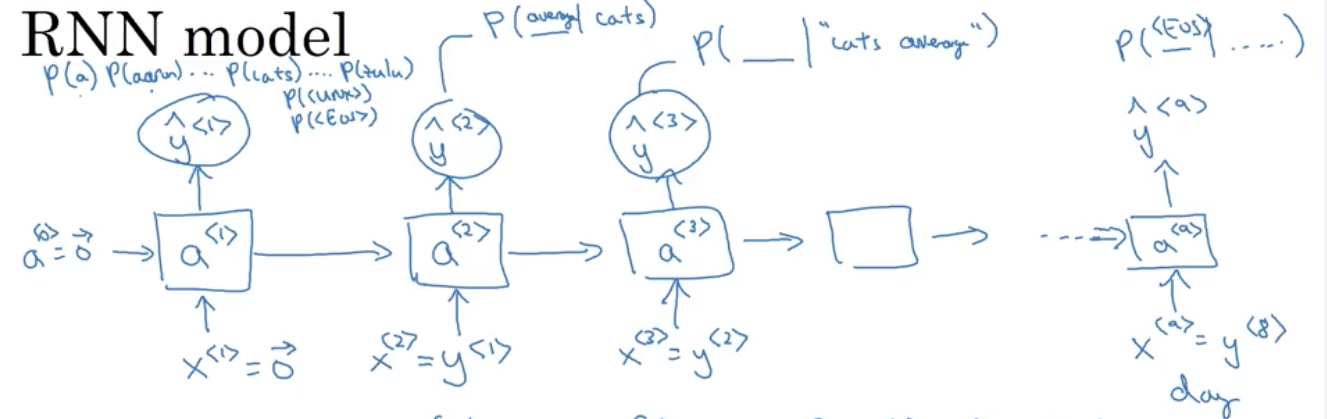


## Sampling Sequences from a Trained Language Model (RNN)

- At each time step `t`, the output `yᵗ` is a probability distribution over the vocabulary.
- We **sample the first word** from `y¹` (e.g., "The").
- Convert the sampled word into a one-hot vector and feed it as input to the next time step.
- Repeat this process until:
  - An `EOS` (End of Sentence) token is generated, or
  - A fixed maximum number of words is reached.

### Character-Level Models

- Instead of words, the vocabulary can consist of **characters**.
- In this case, `y¹`, `y²`, etc., are characters, not words.
- **No need for an Unknown token**, since any word can be built from characters.
- **Trade-offs**:
  - Pros: Handles rare or unseen words naturally.
  - Cons: Sequences are longer, making it harder to model long-range dependencies.
  - More computationally expensive, but increasingly popular in specialized applications due to better hardware and flexibility.


## Addressing the Vanishing Gradient Problem in RNNs

Language can involve **long-term dependencies**, where a word early in the sentence influences a word much later.

**Example**:

- "The cat, ... **was** full"  
- "The cats, ... **were** full"


### The Problem

- In deep RNNs, **backpropagation through time (BPTT)** struggles to carry error signals from later time steps back to earlier ones.
- This leads to **vanishing gradients**, making it hard for the model to "remember" important information like singular vs. plural subjects over long distances.
- How to solve? Gated Recurrent Units (GRU)

### Exploding Gradients

- **Exploding gradients** can also occur (less frequently), where gradients grow too large (resulting is " Not a number" by overflow)
- A common solution is **gradient clipping**: limit the norm of the gradient vector to a threshold to prevent instability.

# Gated Recurrent Unit (GRU) Simplified

Before GRUs, in standard RNNs:

- The activation at time `t` is computed using the activation from time `t-1`, the input `x` at time `t`, weights `Wₐ`, a bias, and a non-linear function (like `tanh`).


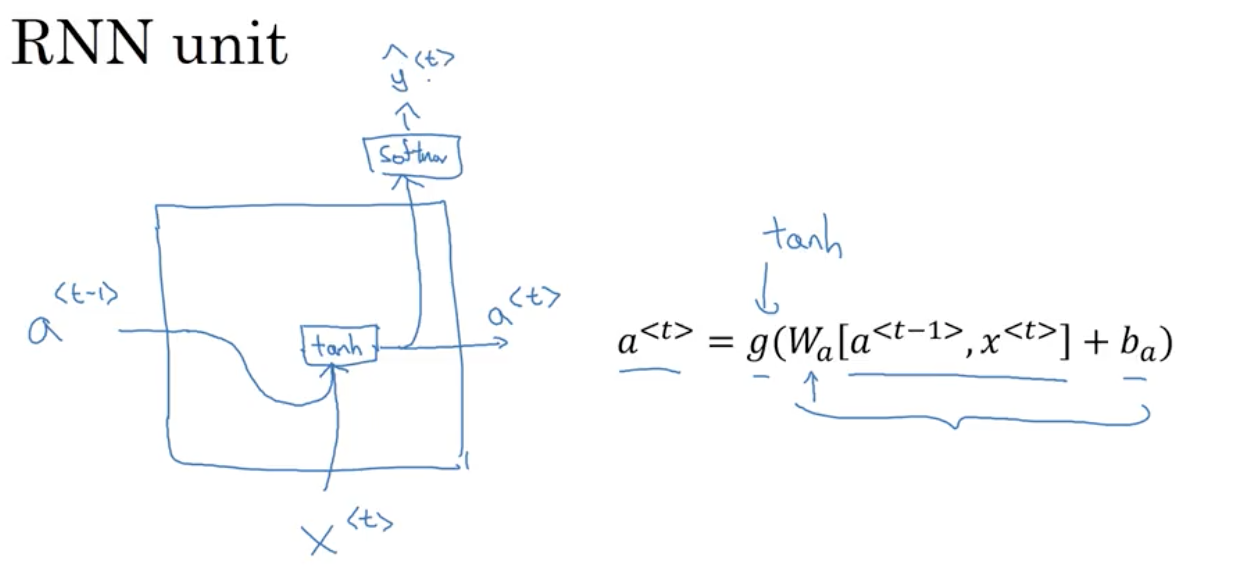

In a GRU, we introduce a **memory cell** `Cᵗ` to help the network remember important information — for example, whether the subject ("cat") is singular or plural.

For now, we can think of:
- `Cᵗ = aᵗ` (the memory cell and the activation are the same in GRU; this differs in LSTM).

`Cᵗ` is usually a vector — not just one value — to store multiple pieces of information (like number, gender, tense, etc.), not just one bit like singular/plural.


At each time step `t`, we decide whether to update the memory cell using a **candidate value** `Čᵗ`:


The **update gate** `Γᵤ` (gamma update) is computed using a sigmoid function and controls whether the memory should be updated:
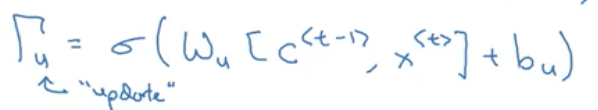

This gate decides **when** to update the memory:

- If the new word changes the context (e.g., tells us the subject is plural), we want to **update** the memory.
- If not, we want to **keep** the previous memory.

So we combine the old memory and the new candidate using the update gate:

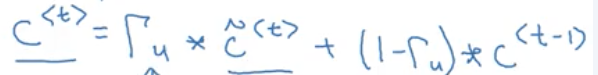

- If `Γᵤ = 1`, the memory cell is fully updated: `Cᵗ = Čᵗ`.
- If `Γᵤ = 0`, the memory is kept: `Cᵗ = Cᵗ₋₁`.

This allows the GRU to **remember useful information** over many time steps:

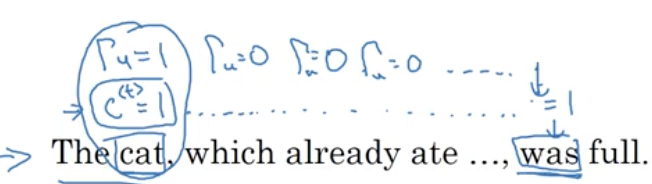

Because the update gate uses a sigmoid, it's often close to zero, meaning the memory is preserved across time steps.  
This helps avoid vanishing gradients — since the memory is simply copied:  
`Cᵗ = Cᵗ₋₁` — no small gradients being multiplied again and again.

# FULL GRU (current used version)

The full GRU includes:
- Reset/Relevance gate (to forget irrelevant past info)

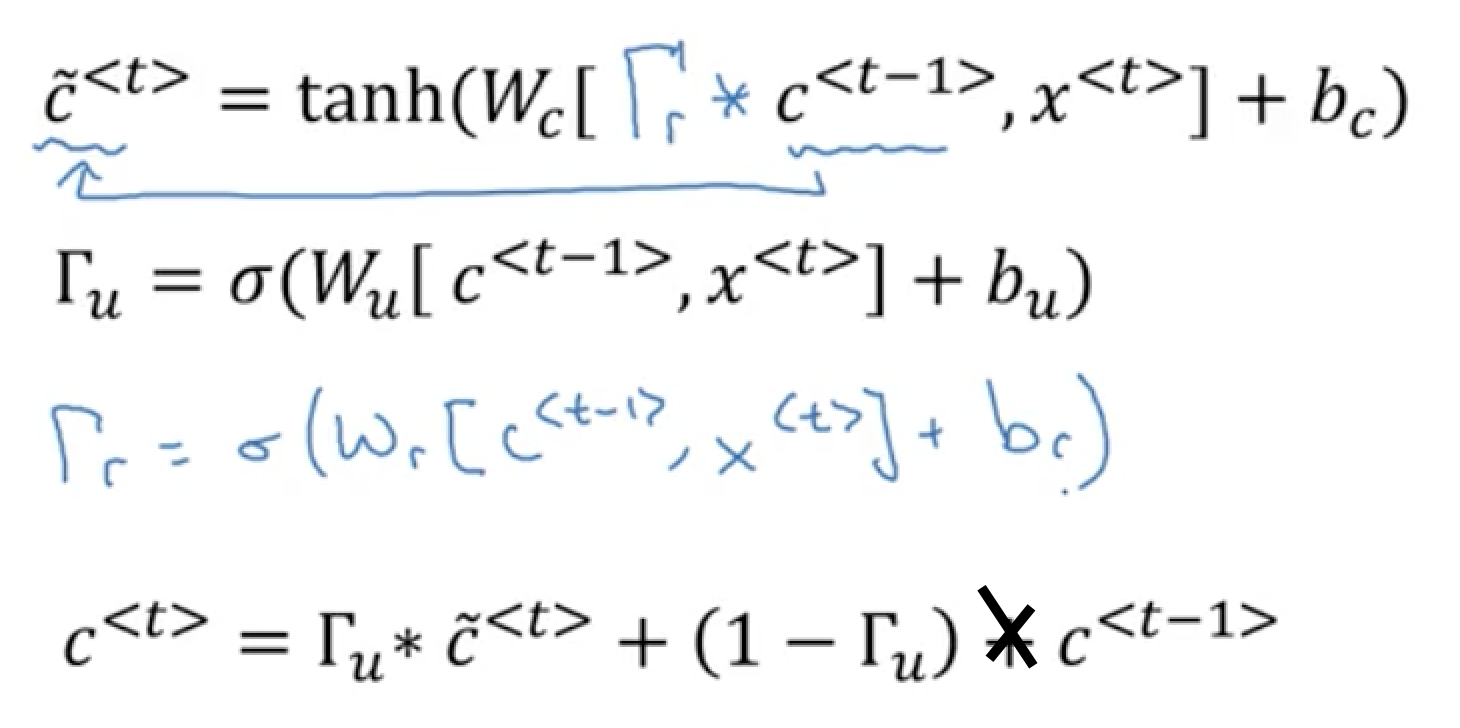

# LSTM
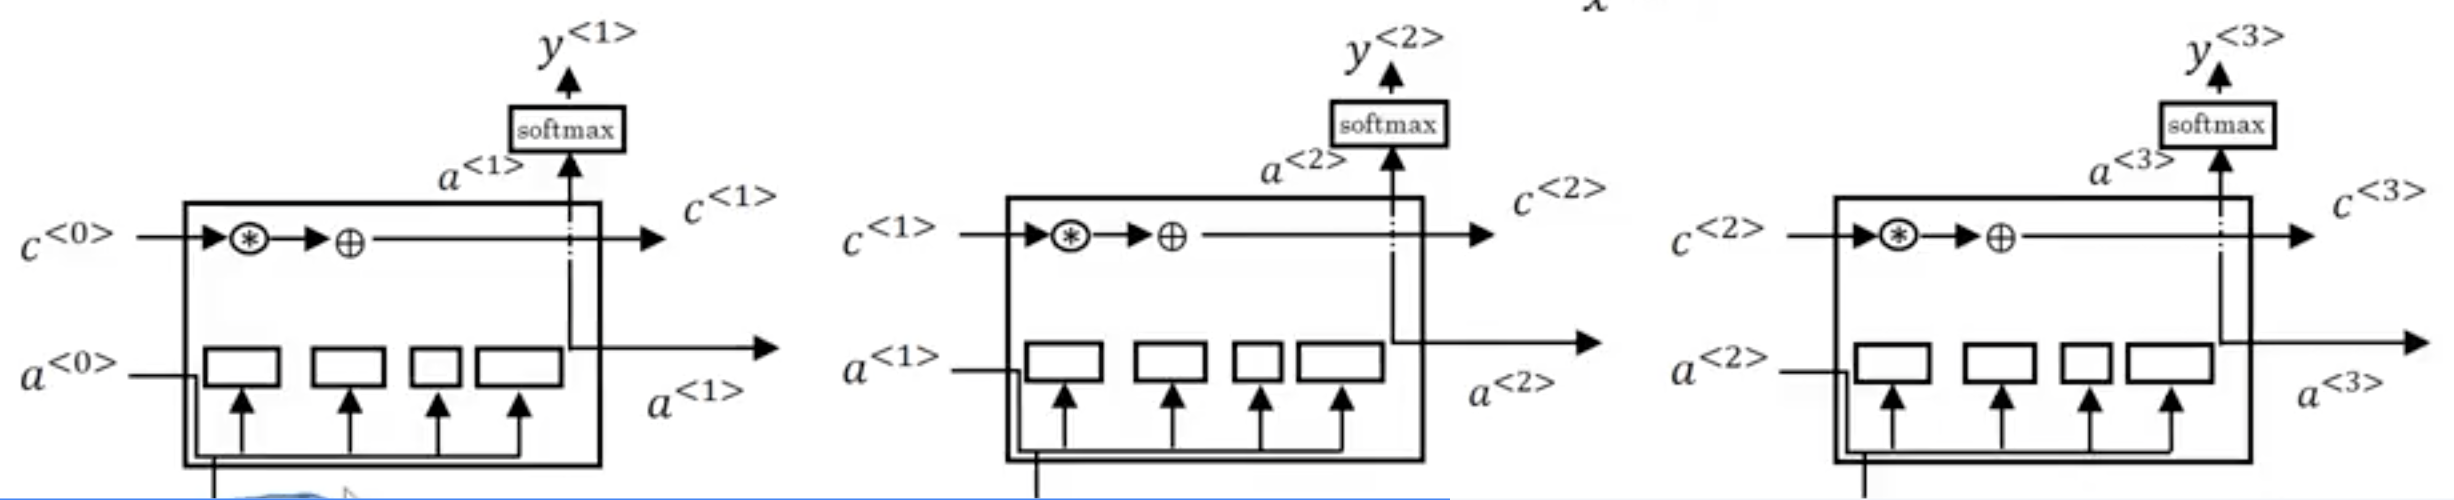
Now we have: 
- forget gate
- update gate
- output gate

- And we output a^t and C^t, which are not the same.


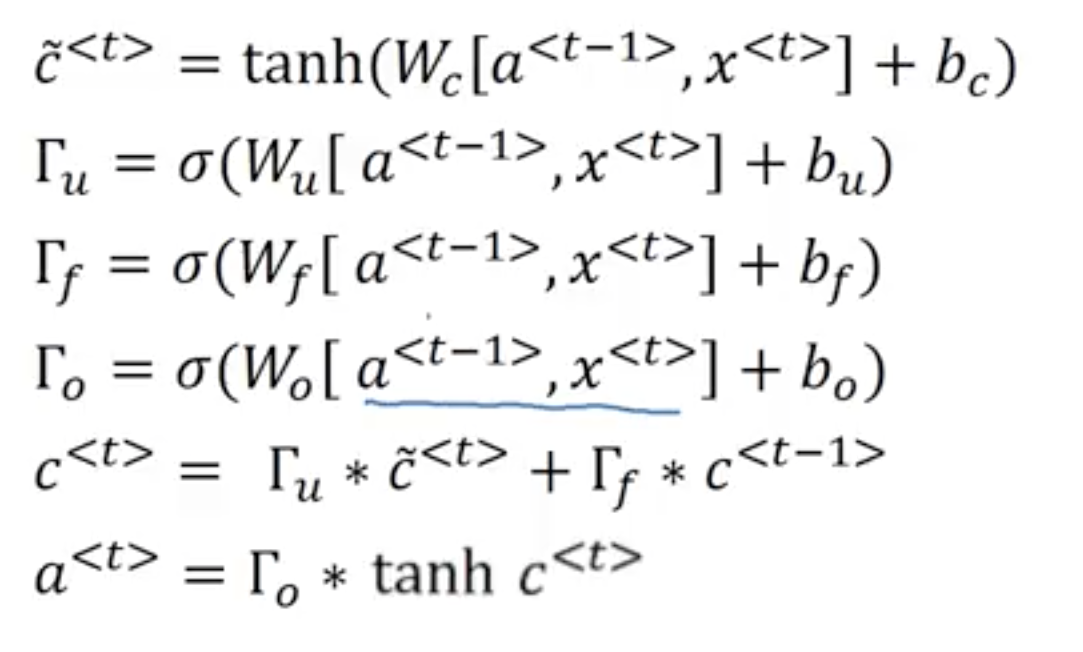

- A common variation is called **peephole connecetion**, where the gates are also affected by c^t-1, instead of only by a^t-1 and x^t.

- GRU scaled better because its simpler for larger models, but lstm is more powerful.

# Bidirectional RNNS (BRNN)

### Problem:
 The context of a token might depend not only on the past, but also the future tokens. For instance: "Teddy bears are on sale" vs " Teddy from how i met ur mother".

 Bidirectional RNNs improve understanding by reading the sentence both forward and backward, so the model can use future context as well as past context.

### Solution:

For each forward layer, you add a corresponding backward layer that processes the input sequence in reverse:

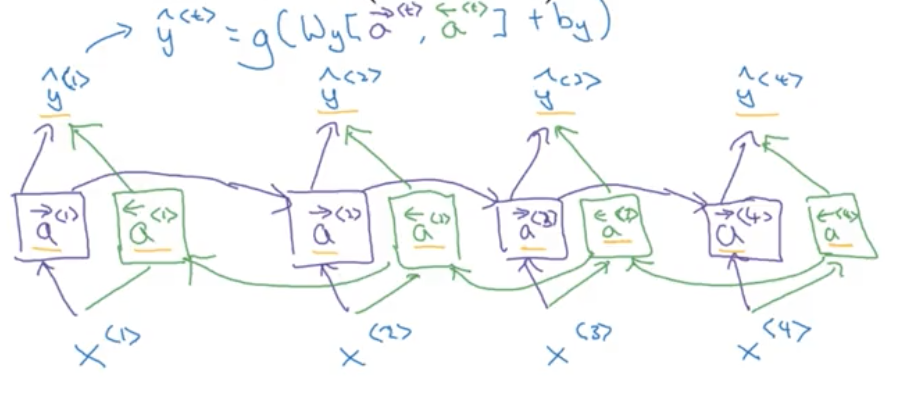

Note: For real time speech recognition this is not enough because it would need to wait for the person to stop speaking to know the full context.

# Deep RNNs

We need to stack multiples RNN layers.

Notation: a[l]^0 -> actination layer l at time t.

Example with 3 hidden layers:

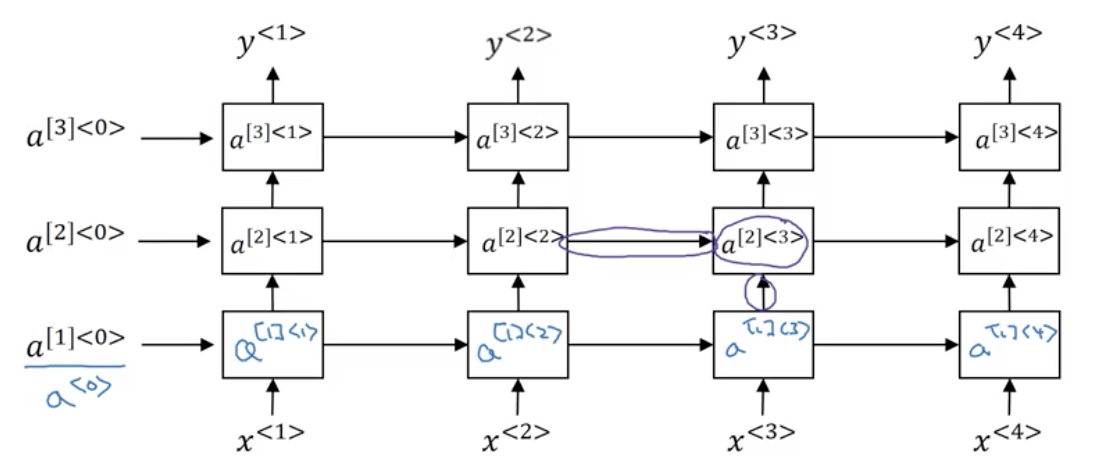